In [1]:
# Import dependencies
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', 400)


In [2]:
# Read the data into a Pandas DataFrame
world_data_df = pd.read_csv('../world-data-2023.csv')
world_data_df.head()


,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [3]:
#Extract country, Out of pockey health expendture, and life expectancy into a new dataframe 
out_of_pocket_df = world_data_df.loc[:, ["Country", "Life expectancy", "Out of pocket health expenditure"]]
out_of_pocket_df.head()


,Country,Life expectancy,Out of pocket health expenditure
0,Afghanistan,64.5,78.40%
1,Albania,78.5,56.90%
2,Algeria,76.7,28.10%
3,Andorra,NaN,36.40%
4,Angola,60.8,33.40%


In [4]:
# Drop all rows with missing information
out_of_pocket_df = out_of_pocket_df.dropna(how='any')

In [5]:
out_of_pocket_df.dtypes


Country                              object
Life expectancy                     float64
Out of pocket health expenditure     object
dtype: object

In [8]:
#Remove % from Total tax rate
out_of_pocket_df["Out of pocket health expenditure"] = out_of_pocket_df["Out of pocket health expenditure"].str.replace('%', '')

In [9]:
out_of_pocket_df.head()


,Country,Life expectancy,Out of pocket health expenditure
0,Afghanistan,64.5,78.40
1,Albania,78.5,56.90
2,Algeria,76.7,28.10
4,Angola,60.8,33.40
5,Antigua and Barbuda,76.9,24.30


In [12]:
out_of_pocket_df["Life expectancy"].count()

183

In [13]:
out_of_pocket_df.dtypes


Country                              object
Life expectancy                     float64
Out of pocket health expenditure     object
dtype: object

In [18]:
# Convert the "life expectancy" and "Out of pocket health expeditures" columns to numeric so the data can be used
out_of_pocket_df['Life expectancy'] = pd.to_numeric(out_of_pocket_df['Life expectancy'])

out_of_pocket_df['Out of pocket health expenditure'] = pd.to_numeric(out_of_pocket_df['Out of pocket health expenditure'])

In [19]:
out_of_pocket_df.dtypes


Country                              object
Life expectancy                     float64
Out of pocket health expenditure    float64
dtype: object

In [20]:
out_of_pocket_df["Out of pocket health expenditure"] = out_of_pocket_df["Out of pocket health expenditure"].astype(str)

In [21]:
out_of_pocket_df.to_csv("Out_of_pocket_df.csv", encoding='utf8', index=False)

In [22]:
# Data Visulization
%matplotlib notebook

import matplotlib.pyplot as plt
import scipy.stats as st

In [24]:
pocket_money = out_of_pocket_df['Out of pocket health expenditure']

life_expectancy = out_of_pocket_df['Life expectancy']


<IPython.core.display.Javascript object>


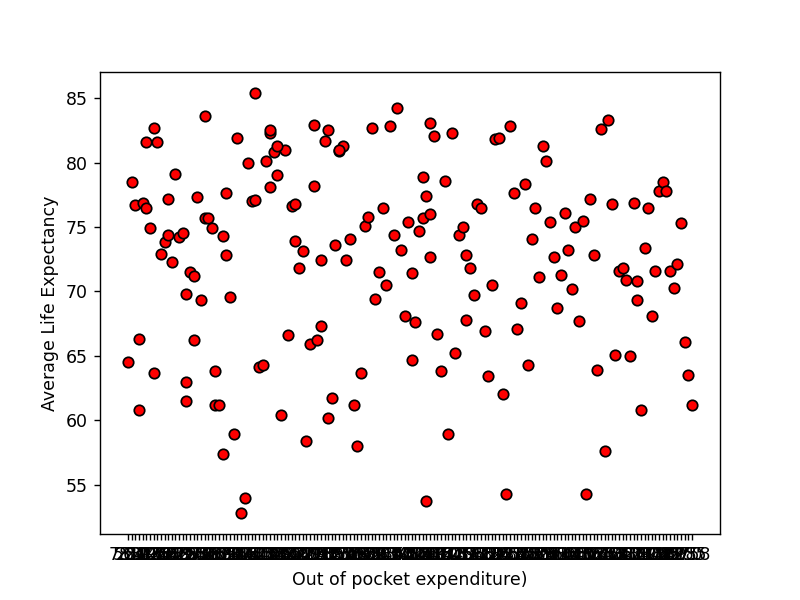

In [25]:
# Tell matplotlib to create a scatter plot based upon the above data
plt.scatter(pocket_money, life_expectancy, marker="o", facecolors="red", edgecolors="black")
plt.show()

In [26]:
plt.xlabel('Out of pocket expenditure)')
plt.ylabel('Average Life Expectancy')
plt.show()

In [27]:
plt.savefig('out_of_pocket_expenditure_life_expectancy.png')